In [2]:
import scanpy as sc

In [3]:
data = sc.read_10x_h5('data/lymph_node_lymphoma_14k_filtered_feature_bc_matrix.h5', gex_only=False)

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
import pandas as pd
cell_meta = pd.read_csv("data/annotated_cell_types_lymphoma.csv", index_col="Barcode")
data.obs = data.obs.join(cell_meta, how="left")

Empty DataFrame
Columns: []
Index: [AAACAGCCAGAACCGA-1, AAACAGCCAGCCTAAC-1, AAACAGCCATATTGAC-1, AAACATGCAAATTCGT-1, AAACATGCAACCTAAT-1, AAACATGCAACTAGGG-1, AAACATGCACGAATTT-1, AAACATGCACTAGCGT-1, AAACATGCAGAAATTG-1, AAACATGCAGGAACAT-1, AAACATGCAGTAATAG-1, AAACATGCATTTAAGC-1, AAACCAACAACAACAA-1, AAACCAACAATCCTAG-1, AAACCAACACAGAACG-1, AAACCAACAGAGAGCC-1, AAACCAACAGGAATCG-1, AAACCAACAGGCGATA-1, AAACCAACATAGACCC-1, AAACCAACATTAAGTC-1, AAACCGAAGAGAGCCG-1, AAACCGAAGATAAAGC-1, AAACCGAAGGAGCAAC-1, AAACCGAAGTCACTAA-1, AAACCGAAGTCATCCC-1, AAACCGAAGTCGCTAG-1, AAACCGAAGTGGACAA-1, AAACCGCGTAATGACT-1, AAACCGCGTATACTGG-1, AAACCGCGTCACGGAT-1, AAACCGCGTGACCTGG-1, AAACCGCGTGATCATG-1, AAACCGCGTGCTCCAC-1, AAACCGCGTTACTAGG-1, AAACCGCGTTAGGTGC-1, AAACCGCGTTCCTGAT-1, AAACCGGCAATATAGG-1, AAACCGGCACAACAAA-1, AAACCGGCACCTACGG-1, AAACCGGCAGCATTAT-1, AAACCGGCAGTTAGCC-1, AAACCGGCATAATTGC-1, AAACGCGCACCTGCCT-1, AAACGCGCACTAAGTT-1, AAACGCGCAGGTTCAC-1, AAACGCGCATCCGTAA-1, AAACGCGCATGAATAG-1, AAACGCGCATTGTGCA-1, AAAC

In [11]:
RNA_data = data[:, data.var['feature_types'] == 'Gene Expression'].copy()
ATAC_data = data[:, data.var['feature_types'] == 'Peaks'].copy()

In [12]:
RNA_data.layers["counts"] = RNA_data.X.copy()
ATAC_data.layers["counts"] = ATAC_data.X.copy()

sc.pp.normalize_total(RNA_data, target_sum=1e6)
sc.pp.log1p(RNA_data)
sc.pp.highly_variable_genes(RNA_data, n_top_genes=3000)
sc.pp.pca(RNA_data, n_comps=50)
sc.pp.neighbors(RNA_data, n_neighbors=15, use_rep='X_pca')

In [28]:
sc.tl.umap(RNA_data, random_state=22)
sc.tl.leiden(RNA_data, flavor="igraph", n_iterations=2, resolution=1, key_added="leiden_1")

In [32]:
RNA_data.uns['umap']

{'params': {'a': 0.5830300205483709,
  'b': 1.334166992455648,
  'random_state': 22}}

In [29]:
sc.tl.leiden(RNA_data, flavor="igraph", n_iterations=2, resolution=2, key_added="leiden_2")

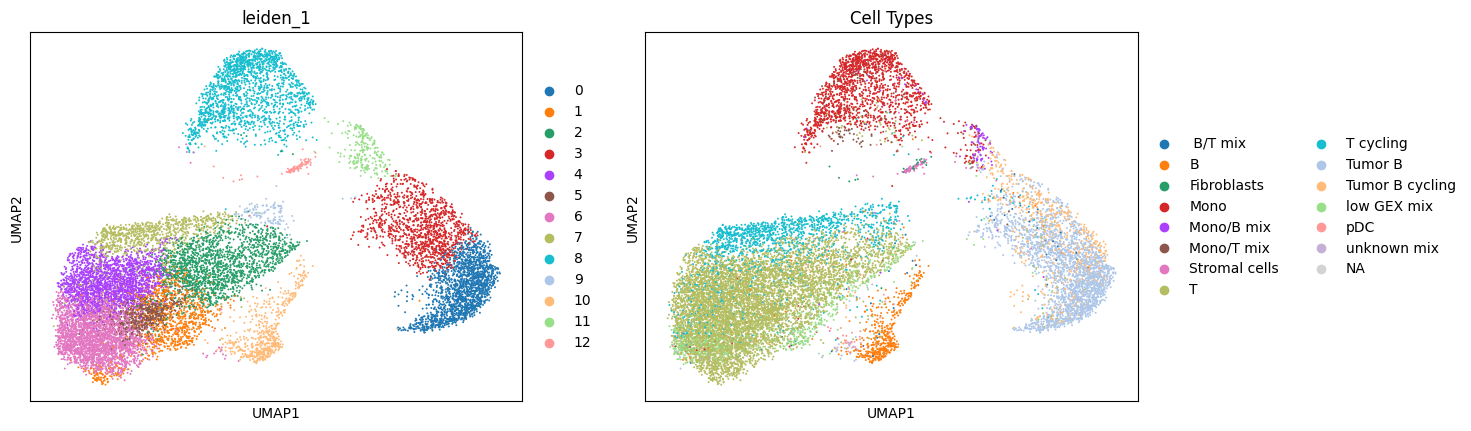

In [30]:
sc.pl.umap(RNA_data, color=["leiden_1", "Cell Types"], size=8)